In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, sosfilt

In [2]:
def wrap(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

In [3]:
f_z = 422500
time = np.linspace(0,1/f_z * 25,100001)

In [4]:
# drive
delta_f_t = 500
f_t = np.linspace(f_z-delta_f_t,f_z+delta_f_t,len(time))

drive = []
for i,j in enumerate(time):
    drive.append(np.cos(f_t[i]*2*np.pi * j))

drive_analytic = hilbert(drive)
drive_phase = (np.angle(drive_analytic))

In [13]:
# signal

phi = np.pi/2 # np.linspace(-np.pi/2,np.pi/2,len(time))

noise = np.random.normal(0,0.1,len(time))
signal = np.cos((f_z-1000)*2*np.pi * time + phi) + noise # * np.hamming(len(time))

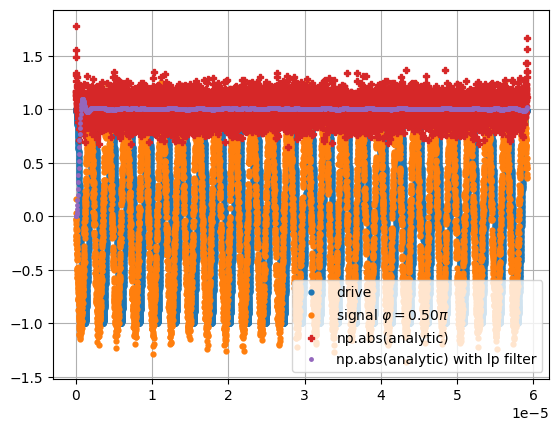

In [14]:
figname = 'signal and drive'
fig, ax = plt.subplots(1,num=figname,clear=True,sharex=True)

ax.plot(time[::10],drive[::10],
ls='',
marker='.',ms=5,mew=2,
label='drive')

ax.plot(time[::10],signal[::10],
ls='',
marker='.',ms=5,mew=2,
label=f'signal $\\varphi =${phi/np.pi:.2f}$\pi$')

ax.plot(0,0)

signal_analytic = hilbert(signal)
signal_phase = (np.angle(signal_analytic))

ax.plot(time[::10],np.abs(signal_analytic)[::10],
ls='',
marker='P',ms=5,mew=1,
label='np.abs(analytic)')

# filter the Hilbert amplitude

sos = butter(3, 0.001, 'lp', output='sos')
filtered = sosfilt(sos, np.abs(signal_analytic))

ax.plot(time[::50],filtered[::50],
ls='',
marker='.',ms=3,mew=2,
label='np.abs(analytic) with lp filter')

ax.grid()

plt.legend(loc=4)

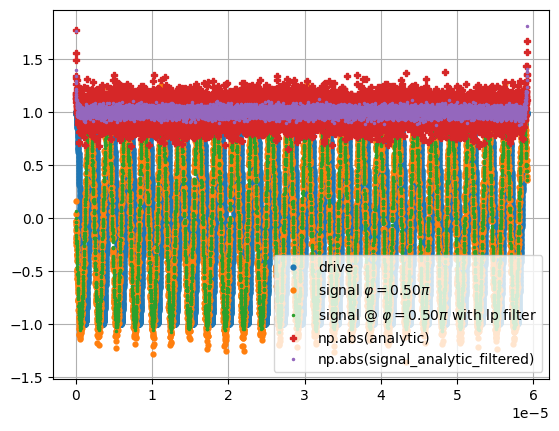

In [15]:
figname = 'signal and drive'
fig, ax = plt.subplots(1,num=figname,clear=True,sharex=True)

ax.plot(time[::10],drive[::10],
ls='',
marker='.',ms=5,mew=2,
label='drive')

ax.plot(time[::10],signal[::10],
ls='',
marker='.',ms=5,mew=2,
label=f'signal $\\varphi =${phi/np.pi:.2f}$\pi$')

# filter the signal

sos = butter(3, 0.1, 'lp', output='sos')
filtered_signal = sosfilt(sos, signal)

ax.plot(time[::10],filtered_signal[::10],
ls='',
marker='.',ms=3,mew=1,
label=f'signal @ $\\varphi =${phi/np.pi:.2f}$\pi$ with lp filter')

signal_analytic_filtered = hilbert(filtered_signal)
signal_phase_filtered = (np.angle(signal_analytic_filtered))

ax.plot(time[::10],np.abs(hilbert(signal))[::10],
ls='',
marker='P',ms=5,mew=1,
label='np.abs(analytic)')

ax.plot(time[::10],np.abs(signal_analytic_filtered)[::10],
ls='',
marker='.',ms=3,mew=1,
label='np.abs(signal_analytic_filtered)')

ax.grid()

plt.legend(loc=4)

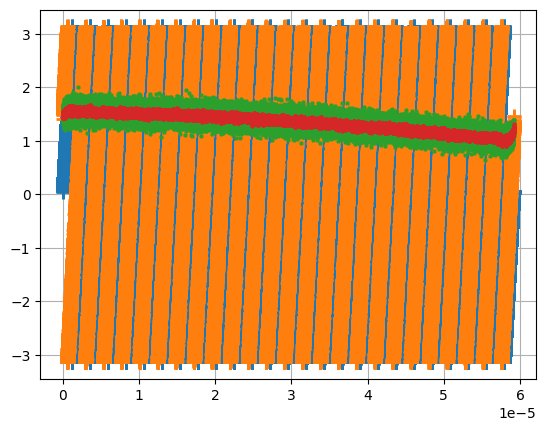

In [17]:
figname = 'ion_phase'
fig, ax = plt.subplots(1,num=figname,clear=True,sharex=True)

ax.plot(time,drive_phase,
ls='',
marker='+',ms=10,mew=2,
label='drive')

ax.plot(time,signal_phase,
ls='',
marker='+',ms=10,mew=2,
label='signal')

ax.plot(time,wrap(signal_phase - drive_phase),
ls='',
marker='+',ms=3,mew=2,
label='signal')

ax.plot(time,wrap(signal_phase_filtered - drive_phase),
ls='',
marker='+',ms=3,mew=2,
label='signal')

ax.grid()